## 데이터 셋에서 결측치의 위치 확인 실습

In [7]:
import pandas as pd
import numpy as np

#예시 데이터 생성
data = pd.DataFrame({
    'A' : [1, 2, np.nan, 4, 5],
    'B' : [np.nan, np.nan, 6, 7, 8],
    'C' : [9, 10, 11, 12, np.nan]
})

print(data)

     A    B     C
0  1.0  NaN   9.0
1  2.0  NaN  10.0
2  NaN  6.0  11.0
3  4.0  7.0  12.0
4  5.0  8.0   NaN


## 결측치 위치 확인

In [2]:
print(data.isnull())

       A      B      C
0  False   True  False
1  False   True  False
2   True  False  False
3  False  False  False
4  False  False   True


### 데이터 셋에서 결측치의 위치 확인 실습 - 히트맵 시각화

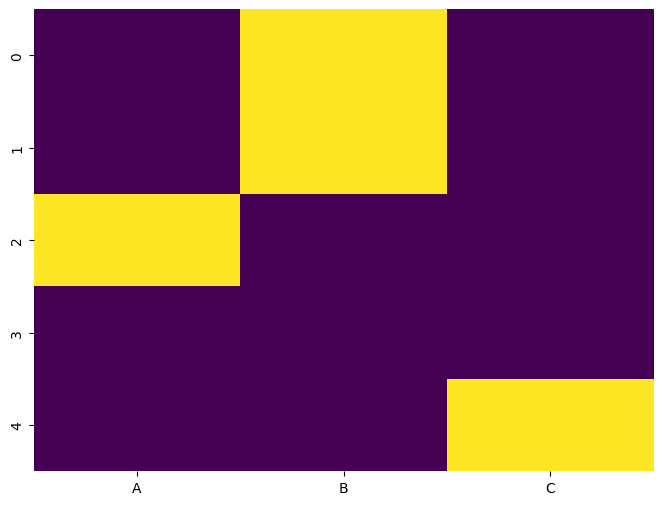

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.show()

### 데이터 셋에서 결측치의 위치 확인

In [5]:
#결측치 개수 확인
missing_count = data.isnull().sum()
print(missing_count)

A    1
B    2
C    1
dtype: int64


### 시계열 데이터 전처리 - 결측치가 있는 행 삭제 실습

In [15]:
dates = pd.date_range(start='2023-01-01', periods=500, freq='D')
values = np.random.randn(500)

#결측치 생성
values[10] = np.nan

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

row = data.iloc[10]
print(row)

Date     2023-01-11 00:00:00
Value                    NaN
Name: 10, dtype: object


#### 결측치 개수 확인 체크

In [16]:
print(data.isnull().sum())

Date     0
Value    1
dtype: int64


In [18]:
data_without_missing = data.dropna(axis=0)

#결측치 삭제 여부 확인 체크
print(data_without_missing)

          Date     Value
0   2023-01-01 -0.909545
1   2023-01-02  0.065846
2   2023-01-03  1.329828
3   2023-01-04 -0.429228
4   2023-01-05  0.703574
..         ...       ...
495 2024-05-10  0.070510
496 2024-05-11 -1.294220
497 2024-05-12 -0.861337
498 2024-05-13  1.595910
499 2024-05-14 -2.561883

[499 rows x 2 columns]


## 선형보간 - pandas를 활용한 선형 보간 실습

In [24]:
#시계열 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
values = [1, 2, 3,  np.nan, 5, 6, np.nan, 8, 9, np.nan]

#데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)

        Date  Value
0 2023-01-01    1.0
1 2023-01-02    2.0
2 2023-01-03    3.0
3 2023-01-04    NaN
4 2023-01-05    5.0
5 2023-01-06    6.0
6 2023-01-07    NaN
7 2023-01-08    8.0
8 2023-01-09    9.0
9 2023-01-10    NaN


#### 선행 보간 적용

In [25]:
data['Value_linear'] = data['Value'].interpolate(method='linear')
print(data)

        Date  Value  Value_linear
0 2023-01-01    1.0           1.0
1 2023-01-02    2.0           2.0
2 2023-01-03    3.0           3.0
3 2023-01-04    NaN           4.0
4 2023-01-05    5.0           5.0
5 2023-01-06    6.0           6.0
6 2023-01-07    NaN           7.0
7 2023-01-08    8.0           8.0
8 2023-01-09    9.0           9.0
9 2023-01-10    NaN           9.0


#### 시각화

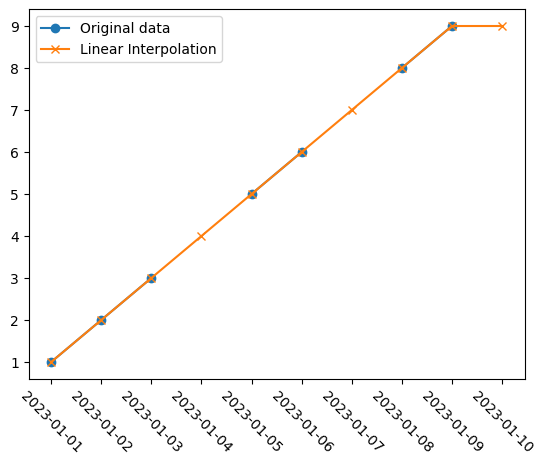

In [28]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original data')
plt.plot(data['Date'], data['Value_linear'], 'x-', label='Linear Interpolation')
plt.legend()
plt.xticks(rotation=-45)
plt.show()